# Caltech Machine Learning Homework # 4

In [198]:
import numpy as np
from sklearn.linear_model import Perceptron
import random
import math
import matplotlib.pyplot as plt
from typing import List
from itertools import product
import scipy.special
from scipy import optimize

Instructions: https://work.caltech.edu/homework/hw4.pdf

Answers: http://work.caltech.edu/homework/hw4_sol.pdf

## Generalization Error

![](imgs/genererr1.png)

Plugging the given numbers into the VC Inequality on WolframAlpha gives the following numerical approximation:

![](imgs/generrsol1.png)

So it looks like (d) is closest.

![](imgs/genererr2.png)

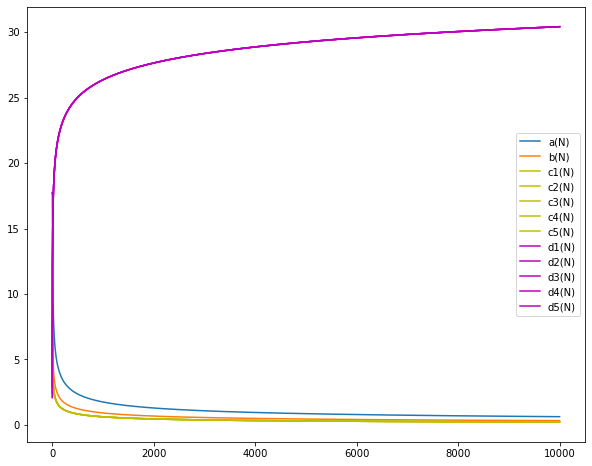

In [4]:
d_vc = 50
delta = 0.05

N = np.arange(1, 10000, 0.5, dtype=np.float128)

def a(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (8 / N) * np.log( (4*m_H) / delta ) )
  
def b(N):
    m_H = N**d_vc # Approximate bound for growth function
    return math.sqrt( (2 * np.log(float(2*N*m_H)) / N ) ) + math.sqrt( (2/N) * np.log(1/delta + 1/N) )
   
# How do we deal with the implicit epsilon?
# Let's looks at a few extreme values of epsilon?
e_min = 0
e_small = 0.01
e = 0.5
e_large = 0.99
e_max = 1
              
def c1(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (1 / N) * ( 2 * e_min + np.log( (6*m_H) / delta ) ) )              
def c2(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (1 / N) * ( 2 * e_small + np.log( (6*m_H) / delta ) ) )
def c3(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (1 / N) * ( 2 * e + np.log( (6*m_H) / delta ) ) )
def c4(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (1 / N) * ( 2 * e_large + np.log( (6*m_H) / delta ) ) )
def c5(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (1 / N) * ( 2 * e_max + np.log( (6*m_H) / delta ) ) )
    
def d1(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * (4*e_min*(1+e_min)) + np.log( (4*m_H) / delta ) )
def d2(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * (4*e_small*(1+e_small)) + np.log( (4*m_H) / delta ) )
def d3(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * (4*e*(1+e)) + np.log( (4*m_H) / delta ) )
def d4(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * (4*e_large*(1+e_large)) + np.log( (4*m_H) / delta ) )
def d5(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * (4*e_max*(1+e_max)) + np.log( (4*m_H) / delta ) )


plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(a)(N), label='a(N)')
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c1)(N), label='c1(N)', color='y')
plt.plot(N, np.vectorize(c2)(N), label='c2(N)', color='y')
plt.plot(N, np.vectorize(c3)(N), label='c3(N)', color='y')
plt.plot(N, np.vectorize(c4)(N), label='c4(N)', color='y')
plt.plot(N, np.vectorize(c5)(N), label='c5(N)', color='y')
plt.plot(N, np.vectorize(d1)(N), label='d1(N)', color='m')
plt.plot(N, np.vectorize(d2)(N), label='d2(N)', color='m')
plt.plot(N, np.vectorize(d3)(N), label='d3(N)', color='m')
plt.plot(N, np.vectorize(d4)(N), label='d4(N)', color='m')
plt.plot(N, np.vectorize(d5)(N), label='d5(N)', color='m')
plt.legend()
plt.show()


We can clearly exclude (d) from this, will should allow us to get a closer look at the remaining options

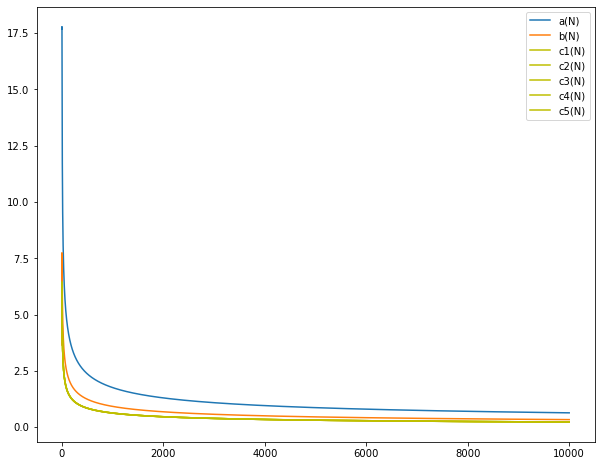

In [5]:
plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(a)(N), label='a(N)')
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c1)(N), label='c1(N)', color='y')
plt.plot(N, np.vectorize(c2)(N), label='c2(N)', color='y')
plt.plot(N, np.vectorize(c3)(N), label='c3(N)', color='y')
plt.plot(N, np.vectorize(c4)(N), label='c4(N)', color='y')
plt.plot(N, np.vectorize(c5)(N), label='c5(N)', color='y')
plt.legend()
plt.show()

Let's zoom in around the N=10,000 mark that we're interested in

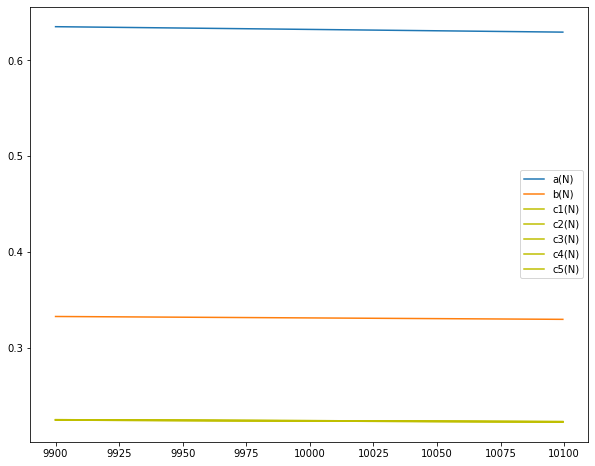

In [6]:
N = np.arange(9900, 10100, 0.5)

plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(a)(N), label='a(N)')
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c1)(N), label='c1(N)', color='y')
plt.plot(N, np.vectorize(c2)(N), label='c2(N)', color='y')
plt.plot(N, np.vectorize(c3)(N), label='c3(N)', color='y')
plt.plot(N, np.vectorize(c4)(N), label='c4(N)', color='y')
plt.plot(N, np.vectorize(c5)(N), label='c5(N)', color='y')
plt.legend()
plt.show()


Aaaaand the winner is (c)

Except I'm wrong again =)

Ah, I just had some wrong parentheses for the Devroye bound, let's do that again :)

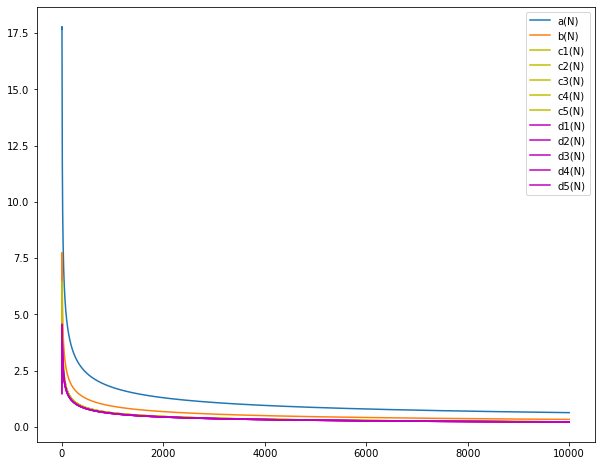

In [7]:
N = np.arange(1, 10000, 0.5, dtype=np.float128)

def d1(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * ( 4*e_min*(1+e_min) + np.log( (4*m_H) / delta ) ) )
def d2(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * ( 4*e_min*(1+e_small) + np.log( (4*m_H) / delta ) ) )
def d3(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * ( 4*e*(1+e) + np.log( (4*m_H) / delta ) ) )
def d4(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * ( 4*e_large*(1+e_large) + np.log( (4*m_H) / delta ) ) )
def d5(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * ( 4*e_large*(1+e_large) + np.log( (4*m_H) / delta ) ) )

plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(a)(N), label='a(N)')
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c1)(N), label='c1(N)', color='y')
plt.plot(N, np.vectorize(c2)(N), label='c2(N)', color='y')
plt.plot(N, np.vectorize(c3)(N), label='c3(N)', color='y')
plt.plot(N, np.vectorize(c4)(N), label='c4(N)', color='y')
plt.plot(N, np.vectorize(c5)(N), label='c5(N)', color='y')
plt.plot(N, np.vectorize(d1)(N), label='d1(N)', color='m')
plt.plot(N, np.vectorize(d2)(N), label='d2(N)', color='m')
plt.plot(N, np.vectorize(d3)(N), label='d3(N)', color='m')
plt.plot(N, np.vectorize(d4)(N), label='d4(N)', color='m')
plt.plot(N, np.vectorize(d5)(N), label='d5(N)', color='m')
plt.legend()
plt.show()

Now we can exclude (a) and zoom in

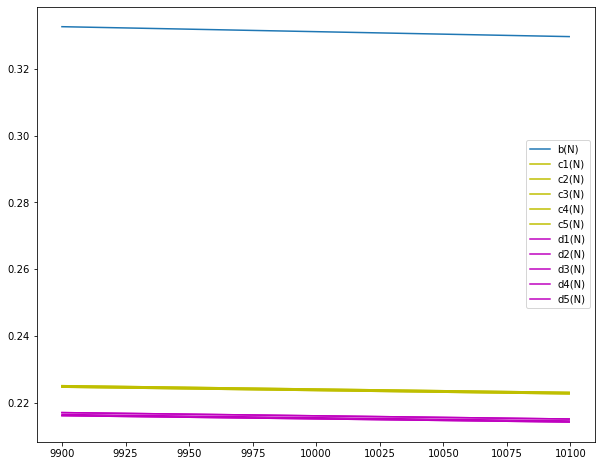

In [8]:
N = np.arange(9900, 10100, 0.5, dtype=np.float128)

plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c1)(N), label='c1(N)', color='y')
plt.plot(N, np.vectorize(c2)(N), label='c2(N)', color='y')
plt.plot(N, np.vectorize(c3)(N), label='c3(N)', color='y')
plt.plot(N, np.vectorize(c4)(N), label='c4(N)', color='y')
plt.plot(N, np.vectorize(c5)(N), label='c5(N)', color='y')
plt.plot(N, np.vectorize(d1)(N), label='d1(N)', color='m')
plt.plot(N, np.vectorize(d2)(N), label='d2(N)', color='m')
plt.plot(N, np.vectorize(d3)(N), label='d3(N)', color='m')
plt.plot(N, np.vectorize(d4)(N), label='d4(N)', color='m')
plt.plot(N, np.vectorize(d5)(N), label='d5(N)', color='m')
plt.legend()
plt.show()

Aaaand the correct winner is (d) =)

I also learned from this notebook: https://nbviewer.jupyter.org/github/homefish/edX_Learning_From_Data_2017/blob/master/homework_4/homework_4_problem_2_plot_bounds.ipynb

...that instead of taking 5 "representative" values for epsilon in the implicit bounds (c) and (d), we could use a numerical solver, such as `scipy.optimize.brent`:

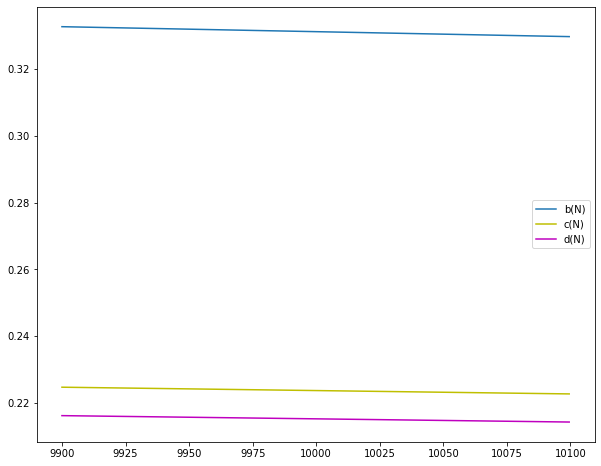

In [20]:
def c(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    f = lambda e: math.sqrt( (1 / N) * ( 2 * e + np.log( (6*m_H) / delta ) ) ) - e
    return optimize.brentq(f, 0, 1)

def d(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    f = lambda e: np.sqrt( (1/(2*N)) * ( 4*e*(1+e) + np.log( (4*m_H) / delta ) ) ) - e
    return optimize.brentq(f, 0, 1)

N = np.arange(9900, 10100, 0.5, dtype=np.float128)

plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c)(N), label='c(N)', color='y')
plt.plot(N, np.vectorize(d)(N), label='d(N)', color='m')
plt.legend()
plt.show()

Niiiiiiiiiiice

![](imgs/genererr3.png)



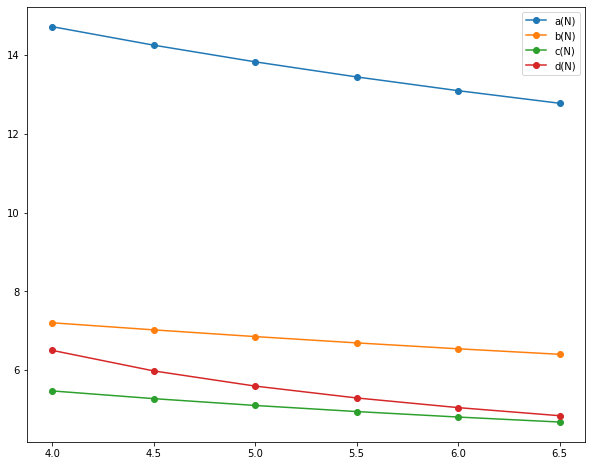

In [31]:
def c(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    f = lambda e: math.sqrt( (1 / N) * ( 2 * e + np.log( (6*m_H) / delta ) ) ) - e
    return optimize.newton(f, 0.5) # Using newton here because the sign does not change in the interval given, which brentq requires

def d(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    f = lambda e: np.sqrt( (1/(2*N)) * ( 4*e*(1+e) + np.log( (4*m_H) / delta ) ) ) - e
    return optimize.newton(f, 0.5) # Using newton here because the sign does not change in the interval given, which brentq requires

N = np.arange(4, 7, 0.5, dtype=np.float128)


plt.figure(figsize=(10, 8))  
plt.plot(N, np.vectorize(a)(N), label='a(N)', marker='o')
plt.plot(N, np.vectorize(b)(N), label='b(N)', marker='o')
plt.plot(N, np.vectorize(c)(N), label='c(N)', marker='o')
plt.plot(N, np.vectorize(d)(N), label='d(N)', marker='o')
plt.legend()
plt.show()

Looks like the winner here is (c)

## Bias and Variance

![](imgs/bias1.png)

Not quite sure how to approach this theoretically, even though it seems like that should be simple, so let's actually build that algorithm!

Let's first look at a few examples of fitting `h(x) = ax` through two points picked at random, using least squares regression that passes through the origin:

In [85]:
def set_axis_cartesian():
    ax = plt.figure(figsize=(8, 8)).add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])

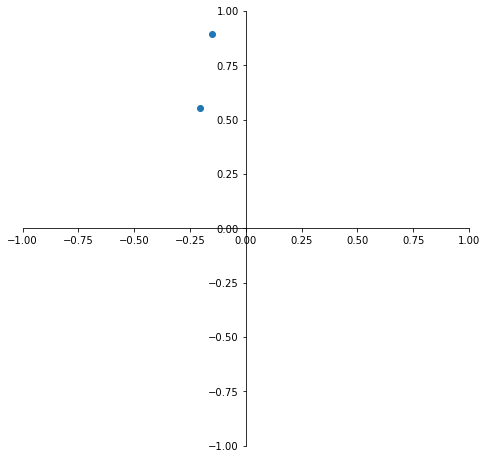

In [123]:
# Pick 2 random points
X = np.random.uniform(-1, 1, size=(2,2))
# Fit a linear regression that goes through the origin
xCoords = X[:,0]
yCoords = X[:,1]
a, SSR, _, _ = np.linalg.lstsq(xCoords[:,np.newaxis], yCoords, rcond=None)

set_axis_cartesian()

plt.plot(xCoords, yCoords, 'o')
plt.show()

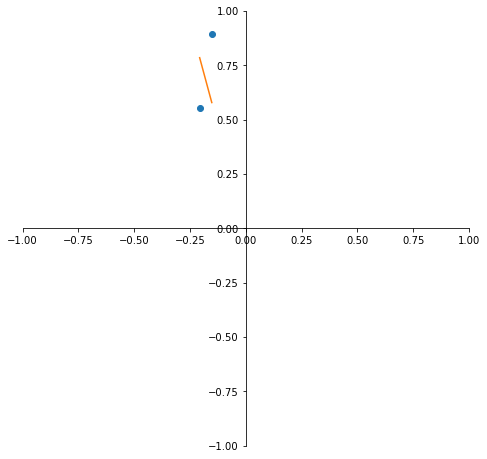

SSR is 0.15287002356737026


In [124]:
set_axis_cartesian()

plt.plot(xCoords, yCoords, 'o')
plt.plot(xCoords, a * xCoords, '-')
plt.show()
print(f"SSR is {SSR[0]}")

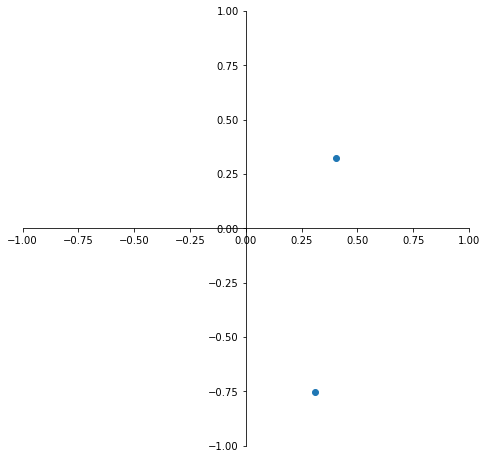

In [119]:
# Pick 2 random points
X = np.random.uniform(-1, 1, size=(2,2))
# Fit a linear regression that goes through the origin
xCoords = X[:,0]
yCoords = X[:,1]
a, SSR, _, _ = np.linalg.lstsq(xCoords[:,np.newaxis], yCoords, rcond=None)

set_axis_cartesian()

plt.plot(xCoords, yCoords, 'o')
plt.show()

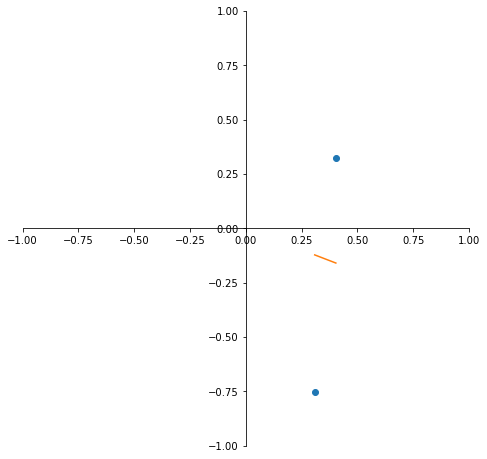

SSR is 0.631313437296388


In [122]:
set_axis_cartesian()

plt.plot(xCoords, yCoords, 'o')
plt.plot(xCoords, a * xCoords, '-')
plt.show()
print(f"SSR is {SSR[0]}")

How does SSR relate to MSE?

![](imgs/MSE.png)

In [130]:
MSE = (1/2) * ( (yCoords[0]-a*xCoords[0])**2 + (yCoords[1]-a*xCoords[1])**2  )
print(f"SSR is {SSR[0]}")
print(f"MSE is {MSE[0]}")
print(f"Twice the MSE is {2*MSE}")b

SSR is 0.15287002356737026
MSE is 0.07643501178368511
Twice the MSE is [0.15287002]


So `MSE` is `SSR/N` or `SSR/2` in our case.

Okay, let's apply this to points coming from the actual training set (`f(x)=sin(πx)`), and repeat to get a numerical expected value

In [180]:
EXPERIMENTS = 1000000

aBars = []

for _ in range(EXPERIMENTS):
    # Pick 2 random points from the target function
    xCoords = np.random.uniform(-1, 1, size=2)
    yCoords = np.sin(np.pi*xCoords)
    a, _, _, _ = np.linalg.lstsq(xCoords[:,np.newaxis], yCoords, rcond=None)
    aBars.append(a[0])
    
aBar = sum(aBars)/len(aBars)
print(f"Expected value for a_bar after {EXPERIMENTS} runs is {aBar}")

Expected value for a_bar after 1000000 runs is 1.4285771619902201


Looks like that corresponds to none of the provided answers, so [e]?

Phew =)

![](imgs/bias2.png)

![](imgs/bias5.png)

The bias will be the total area between our predicted function `gBar(x)=aBar*x` and the actual sine curve `f(x) = sin(πx)`

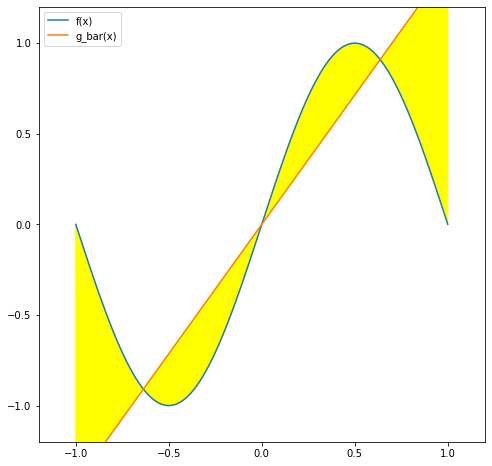

In [205]:
X = np.linspace(-1, 1, 200)

f = lambda x: np.sin(np.pi*x)
g_bar = lambda x: aBar*x

plt.figure(figsize=(8,8))
plt.plot(x, f(x), label="f(x)")
plt.plot(x, g_bar(x), label="g_bar(x)")
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.fill_between(x, f(x), g_bar(x), color="yellow")
plt.legend()
plt.show()


So this should be the sum of 4 different integrals. Let's find the two non-zero intersection points (roots).

In [195]:
root1 = optimize.brentq(lambda x: f(x) - g_bar(x), -1, -0.5)
root3 = optimize.brentq(lambda x: f(x) - g_bar(x), 0.5, 1)
print(f"Root 1 is {root1}")
print(f"Root 3 is {root3}")

Root 1 is -0.6365601743029246
Root 3 is 0.6365601743029246


Now we can integrate, baby!

In [213]:
f_minus_gbar = lambda x: f(x) - g_bar(x)
gbar_minus_f = lambda x: g_bar(x) - f(x)

area1 = scipy.integrate.quad(f_minus_gbar, -1, root1)[0]
area2 = scipy.integrate.quad(gbar_minus_f, root1, 0)[0]
area3 = scipy.integrate.quad(f_minus_gbar, 0, root3)[0]
area4 = scipy.integrate.quad(gbar_minus_f, root3, 1)[0]

bias = area1 + area2 + area3 + area4

print(bias)

0.8004707583136002


**Answer**: This is closest to [d]

Aaand we're wrong again =) why?